In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import corner
import math
import csv
from numpy import *

import matplotlib
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.patches as mpatches
from tqdm.notebook import tqdm

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import sklearn.metrics as metrics
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image
from fpdf import FPDF
from PIL import Image
import pydotplus

%matplotlib inline
import graphviz
from sklearn import tree
from xgboost import plot_tree
from sklearn.tree import DecisionTreeClassifier

### 2-3mm

In [33]:
planets = pd.read_csv('2-3 mm notma.csv', skipinitialspace=True)

print(planets.columns)

Index(['run', 'planet', 'cv e', 'cv a', 'cv peri', 'cv i', 'initial e',
       'final e', 'mean e', 'min e', 'max e', 'sd e', 'initial i', 'final i',
       'mean i', 'min i', 'max i', 'sd i', 'initial mhr1', 'final mhr1',
       'mean mhr1', 'min mhr1', 'max mhr1', 'sd mhr1', 'initial mhr2',
       'final mhr2', 'mean mhr2', 'min mhr2', 'max mhr2', 'sd mhr2',
       'initial log a1_ratio', 'final log a1_ratio', 'mean log a1_ratio',
       'min log a1_ratio', 'max log a1_ratio', 'sd log a1_ratio',
       'initial log a2_ratio', 'final log a2_ratio', 'mean log a2_ratio',
       'min log a2_ratio', 'max log a2_ratio', 'sd log a2_ratio',
       'initial log mass1_ratio', 'final log mass1_ratio',
       'mean log mass1_ratio', 'min log mass1_ratio', 'max log mass1_ratio',
       'sd log mass1_ratio', 'initial log mass2_ratio',
       'final log mass2_ratio', 'mean log mass2_ratio', 'min log mass2_ratio',
       'max log mass2_ratio', 'sd log mass2_ratio', 'end time', 'fate'],
      dtype='

In [34]:
fates = list(set(planets['fate']))

types = {fates[i] : i for i in range(len(fates))}

classes = []

for i in range(len(planets['fate'])):
    if planets['fate'][i] == "remaining":
        classes += [0]
    else:
        classes += [1]
        
classes = np.array(classes)

In [35]:
features_train, features_test, classes_train, classes_test = train_test_split(planets, classes, test_size=0.3, random_state=183)

ru = features_test['run'].to_numpy()
p = features_test['planet'].to_numpy()
et = features_test['end time'].to_numpy()
fa = features_test['fate'].to_numpy()

ru2 = features_train['run'].to_numpy()
p2 = features_train['planet'].to_numpy()
et2 = features_train['end time'].to_numpy()
fa2 = features_train['fate'].to_numpy()


d = ['run', 'planet', 'fate', 'end time', 'final log mass1_ratio',
       'mean log mass1_ratio', 'min log mass1_ratio', 'max log mass1_ratio',
       'sd log mass1_ratio', 'final log mass2_ratio', 
       'mean log mass2_ratio', 'min log mass2_ratio',
       'max log mass2_ratio', 'sd log mass2_ratio']


e = ['e']
mhr1 = ['mhr1']
mhr2 = ['mhr2']
a2 = ['log a2_ratio']

a1 = ['log a1_ratio']
o = ['i', 'a']

for v in mhr1:
    d.append('initial ' + str(v))
    d.append('final ' + str(v))
    d.append('mean ' + str(v))
    d.append('min ' + str(v))
#     d.append('max ' + str(v))
#     d.append('sd ' + str(v))

for v in mhr2:
    d.append('initial ' + str(v))
    d.append('final ' + str(v))
    d.append('mean ' + str(v))
    d.append('min ' + str(v))
    d.append('max ' + str(v))
#     d.append('sd ' + str(v))

for v in e:
    d.append('initial ' + str(v))
    d.append('final ' + str(v))
    d.append('mean ' + str(v))
#     d.append('min ' + str(v))
#     d.append('max ' + str(v))
#     d.append('sd ' + str(v))
    d.append('cv ' + str(v))
    
for v in a2:
    d.append('initial ' + str(v))
    d.append('final ' + str(v))
    d.append('mean ' + str(v))
    d.append('min ' + str(v))
    d.append('max ' + str(v))
    d.append('sd ' + str(v))

for v in a1:
    d.append('initial ' + str(v))
    d.append('final ' + str(v))
#     d.append('mean ' + str(v))
#     d.append('min ' + str(v))
    d.append('max ' + str(v))
#     d.append('sd ' + str(v))

for v in o:
    if v == 'i':
        d.append('initial ' + str(v))
        d.append('final ' + str(v))
        d.append('mean ' + str(v))
        d.append('min ' + str(v))
        d.append('max ' + str(v))
#         d.append('sd ' + str(v))
#         d.append('cv ' + str(v))
    else:
        d.append('cv ' + str(v))
            

      
ids_train = features_train['planet'].to_numpy()
features_train.drop(d, axis=1, inplace=True)

cols = features_train.columns
features_train = features_train.to_numpy()

ids_test = features_test['planet'].to_numpy()
features_test.drop(d, axis=1, inplace=True)
features_test = features_test.to_numpy()

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [36]:
classifier = GradientBoostingClassifier(learning_rate = 0.07, max_depth = 5, max_features = 'sqrt', n_estimators = 150, random_state = 183) # ne = 120-160ish

classifier.fit(features_train, classes_train)

score = classifier.decision_function(features_test)
classes_predict = classifier.predict(features_test)
print('classifier is ', accuracy_score(classes_test, classes_predict) * 100, '% accurate on testing set' )

classifier is  90.66666666666666 % accurate on testing set


In [37]:
feats = classifier.feature_importances_
inds = np.argsort(feats)[::-1]

for i in range(len(inds)):
    print(cols[inds[i]], feats[inds[i]])

initial log mass1_ratio 0.20695751140756075
initial log mass2_ratio 0.17686152564573818
cv peri 0.08715836353908091
sd e 0.08542322792587405
sd i 0.08437230611120845
sd mhr1 0.06651960428785048
max mhr1 0.04671424835311414
sd mhr2 0.04494718270267763
max e 0.04469002459230496
cv i 0.03844551759209378
sd log a1_ratio 0.03785006775060415
min log a1_ratio 0.029959267684803843
min e 0.027091450001418
mean log a1_ratio 0.023009702405670594


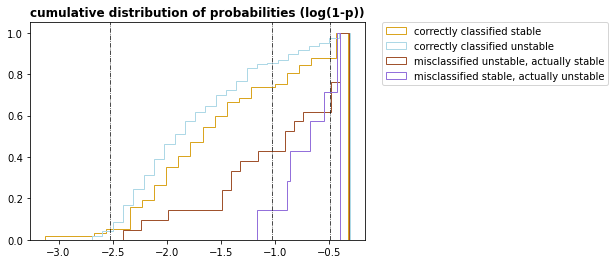

In [38]:
fig = plt.figure()
plt.title('cumulative distribution of probabilities (log(1-p))', fontweight='bold')

p = []
r = classifier.predict_proba(features_test)

for i in range(0,len(r)):
    if (classes_test[i] == classes_predict[i]):
        if (classes_test[i] == 0):
            p.append(np.log(1-r[i][0]))
        else:
            p.append(np.log(1-r[i][1]))
    else:
        if (classes_test[i] == 0):
            p.append(np.log10(1-r[i][1]))
        else:
            p.append(np.log10(1-r[i][0]))
              

                
cs = []
cu = []
ts = []   # misclassified unstable, actually stable
tu = []   # misclassified stable, actually unstable


# correct
inds = []

for i in range(0,len(classes_test)):
    if (classes_test[i] == classes_predict[i]):   # 0 = stable, 1 = unstable
        inds.append(i)

for i in range(0,len(r)):
    if (classes_test[i] == classes_predict[i]):
        if (classes_test[i] == 0):
            cs.append(np.log10(1-r[i][0]))
        else:
            cu.append(np.log10(1-r[i][1]))
            
            
# wrong
inds2 = []

for i in range(0,len(classes_test)):
    if (classes_test[i] != classes_predict[i]):
        inds2.append(i)

for i in range(0,len(r)):
    if (classes_test[i] != classes_predict[i]):
        if (classes_test[i] == 0):
            ts.append(np.log10(1-r[i][1]))
        else:
            tu.append(np.log10(1-r[i][0]))
                
                
                
n, bins, patches = plt.hist(cs, 25, density=True, histtype='step', cumulative=True, label='correctly classified stable', color='goldenrod')
n, bins, patches = plt.hist(cu, 25, density=True, histtype='step', cumulative=True, label='correctly classified unstable', color='lightblue')
n, bins, patches = plt.hist(ts, 25, density=True, histtype='step', cumulative=True, label='misclassified unstable, actually stable', color='sienna')
n, bins, patches = plt.hist(tu, 25, density=True, histtype='step', cumulative=True, label='misclassified stable, actually unstable', color='mediumpurple')
# n, bins, patches = plt.hist(p, 25, density=True, histtype='step', cumulative=True, label='all', color='black', linewidth=1.25)



# sigmas, log10(1-0.68) = -0.495, log10(1-0.95) = -1.031, log10(1-0.997) = -2.523
plt.axvline(x=-0.495, color='black', linestyle='-.', linewidth=0.7)
plt.axvline(x=-1.031, color='black', linestyle='-.', linewidth=0.7)
plt.axvline(x=-2.523, color='black', linestyle='-.', linewidth=0.7)


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [39]:
print(metrics.classification_report(classes_test, classes_predict, digits=3))

              precision    recall  f1-score   support

           0      0.891     0.731     0.803        78
           1      0.911     0.968     0.939       222

    accuracy                          0.907       300
   macro avg      0.901     0.850     0.871       300
weighted avg      0.906     0.907     0.903       300



### 1-3mm & np

In [20]:
planets = pd.read_csv('1-3mm & np notma.csv', skipinitialspace=True)

print(planets.columns)

Index(['run', 'planet', 'cv e', 'cv a', 'cv pericenter', 'cv i', 'initial e',
       'final e', 'mean e', 'min e',
       ...
       'max log mratio npi', 'sd log mratio npi', 'initial log mratio npo',
       'final log mratio npo', 'mean log mratio npo', 'min log mratio npo',
       'max log mratio npo', 'sd log mratio npo', 'end time', 'fate'],
      dtype='object', length=122)


In [21]:
fates = list(set(planets['fate']))

types = {fates[i] : i for i in range(len(fates))}

classes = []

for i in range(len(planets['fate'])):
    if planets['fate'][i] == "remaining":
        classes += [0]
    else:
        classes += [1]
        
classes = np.array(classes)

In [22]:
features_train, features_test, classes_train, classes_test = train_test_split(planets, classes, test_size=0.3, random_state=183)

ru = features_test['run'].to_numpy()
p = features_test['planet'].to_numpy()
et = features_test['end time'].to_numpy()
fa = features_test['fate'].to_numpy()

ru2 = features_train['run'].to_numpy()
p2 = features_train['planet'].to_numpy()
et2 = features_train['end time'].to_numpy()
fa2 = features_train['fate'].to_numpy()


d = ['run', 'planet', 'cv a', 'initial e', 'final e', 'min e', 'initial i', 'final i', 'mean i', 'min i', 
     'max i', 'initial pericenter', 'mean pericenter', 'min pericenter', 'max pericenter', 'initial jacobi',
     'final jacobi', 'mean jacobi', 'min jacobi', 'sd jacobi', 'initial mhr mm1', 'final mhr mm1', 
     'mean mhr mm1', 'min mhr mm1', 'initial mhr mm2', 'min mhr mm2', 'final mhr mm3', 'mean mhr mm3', 
     'min mhr mm3', 'max mhr mm3', 'initial log aratio mm1', 'final log aratio mm1', 'mean log aratio mm1', 
     'min log aratio mm1', 'max log aratio mm1', 'sd log aratio mm1', 'initial log aratio mm2', 
     'final log aratio mm2', 'max log aratio mm2', 'sd log aratio mm2', 'initial log aratio mm3', 
     'mean log aratio mm3', 'min log aratio mm3', 'max log aratio mm3', 'sd log aratio mm3', 
     'final log mratio mm1', 'mean log mratio mm1', 'min log mratio mm1', 'max log mratio mm1', 
     'sd log mratio mm1', 'final log mratio mm2', 'mean log mratio mm2', 'min log mratio mm2', 
     'max log mratio mm2', 'sd log mratio mm2', 'final log mratio mm3', 'mean log mratio mm3', 
     'min log mratio mm3', 'max log mratio mm3', 'sd log mratio mm3', 'final mhr npi', 'mean mhr npi', 
     'min mhr npi', 'initial mhr npo', 'final mhr npo', 'mean mhr npo', 'sd mhr npo', 
     'initial log aratio npi', 'final log aratio npi', 'mean log aratio npi', 'min log aratio npi', 
     'max log aratio npi', 'sd log aratio npi', 'initial log aratio npo', 'final log aratio npo', 
     'max log aratio npo', 'final log mratio npi', 'mean log mratio npi', 'min log mratio npi', 
     'max log mratio npi', 'sd log mratio npi', 'final log mratio npo', 'mean log mratio npo', 
     'min log mratio npo', 'max log mratio npo', 'sd log mratio npo', 'end time', 'fate']    
    
      
ids_train = features_train['planet'].to_numpy()
features_train.drop(d, axis=1, inplace=True)

cols = features_train.columns
features_train = features_train.to_numpy()

ids_test = features_test['planet'].to_numpy()
features_test.drop(d, axis=1, inplace=True)
features_test = features_test.to_numpy()

In [23]:
classifier = GradientBoostingClassifier(learning_rate = 0.07, max_depth = 5, max_features = 'sqrt', n_estimators = 150, random_state = 183) # ne = 120-160ish

classifier.fit(features_train, classes_train)

score = classifier.decision_function(features_test)
classes_predict = classifier.predict(features_test)
print('classifier is ', accuracy_score(classes_test, classes_predict) * 100, '% accurate on testing set' )

classifier is  92.0 % accurate on testing set


In [24]:
feats = classifier.feature_importances_
inds = np.argsort(feats)[::-1]

for i in range(len(inds)):
    print(cols[inds[i]], feats[inds[i]])

initial log mratio mm1 0.1338825765803269
max mhr mm1 0.115843190459793
initial log mratio mm3 0.06186936937141693
initial log mratio npo 0.060278617390842594
sd e 0.05847683185957459
cv e 0.043445228648918394
sd mhr mm1 0.03935730990415049
initial log mratio mm2 0.038501041233104966
sd pericenter 0.03638747092162255
cv i 0.03243498652698387
initial log mratio npi 0.02977825197655016
max mhr mm2 0.029138284260765947
sd mhr mm2 0.027967294315881318
sd i 0.024089721663985007
mean e 0.021370506850751834
final mhr mm2 0.020981330848549414
cv pericenter 0.016883884986716224
sd mhr mm3 0.01674310662308546
final pericenter 0.01630308246938882
initial mhr mm3 0.01615085247429777
final log aratio mm3 0.015206552579669387
min mhr npo 0.014233949222692692
max mhr npo 0.013581621430317025
mean log aratio mm2 0.013111178690766832
min log aratio npo 0.012318434754421126
min log aratio mm2 0.011985835018064519
sd log aratio npo 0.011886253763457514
max e 0.011806373919231164
max jacobi 0.011557327528

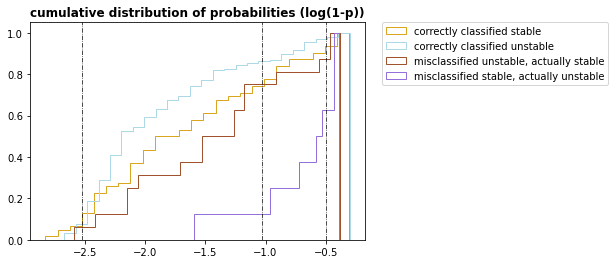

In [26]:
fig = plt.figure()
plt.title('cumulative distribution of probabilities (log(1-p))', fontweight='bold')

p = []
r = classifier.predict_proba(features_test)

for i in range(0,len(r)):
    if (classes_test[i] == classes_predict[i]):
        if (classes_test[i] == 0):
            p.append(np.log(1-r[i][0]))
        else:
            p.append(np.log(1-r[i][1]))
    else:
        if (classes_test[i] == 0):
            p.append(np.log10(1-r[i][1]))
        else:
            p.append(np.log10(1-r[i][0]))
              

                
cs = []
cu = []
ts = []   # misclassified unstable, actually stable
tu = []   # misclassified stable, actually unstable


# correct
inds = []

for i in range(0,len(classes_test)):
    if (classes_test[i] == classes_predict[i]):   # 0 = stable, 1 = unstable
        inds.append(i)

for i in range(0,len(r)):
    if (classes_test[i] == classes_predict[i]):
        if (classes_test[i] == 0):
            cs.append(np.log10(1-r[i][0]))
        else:
            cu.append(np.log10(1-r[i][1]))
            
            
# wrong
inds2 = []

for i in range(0,len(classes_test)):
    if (classes_test[i] != classes_predict[i]):
        inds2.append(i)

for i in range(0,len(r)):
    if (classes_test[i] != classes_predict[i]):
        if (classes_test[i] == 0):
            ts.append(np.log10(1-r[i][1]))
        else:
            tu.append(np.log10(1-r[i][0]))
                
                
                
n, bins, patches = plt.hist(cs, 25, density=True, histtype='step', cumulative=True, label='correctly classified stable', color='goldenrod')
n, bins, patches = plt.hist(cu, 25, density=True, histtype='step', cumulative=True, label='correctly classified unstable', color='lightblue')
n, bins, patches = plt.hist(ts, 25, density=True, histtype='step', cumulative=True, label='misclassified unstable, actually stable', color='sienna')
n, bins, patches = plt.hist(tu, 25, density=True, histtype='step', cumulative=True, label='misclassified stable, actually unstable', color='mediumpurple')
# n, bins, patches = plt.hist(p, 25, density=True, histtype='step', cumulative=True, label='all', color='black', linewidth=1.25)



# sigmas, log10(1-0.68) = -0.495, log10(1-0.95) = -1.031, log10(1-0.997) = -2.523
plt.axvline(x=-0.495, color='black', linestyle='-.', linewidth=0.7)
plt.axvline(x=-1.031, color='black', linestyle='-.', linewidth=0.7)
plt.axvline(x=-2.523, color='black', linestyle='-.', linewidth=0.7)


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [27]:
print(metrics.classification_report(classes_test, classes_predict, digits=3))

              precision    recall  f1-score   support

           0      0.886     0.795     0.838        78
           1      0.930     0.964     0.947       222

    accuracy                          0.920       300
   macro avg      0.908     0.879     0.892       300
weighted avg      0.919     0.920     0.919       300



### standard mm -- ignore

In [18]:
planets2 = pd.read_csv('10 mm revised mass.csv', skipinitialspace=True)

print(planets2.columns)

Index(['run', 'planet', 'cv e', 'cv a', 'cv peri', 'cv i', 'initial e',
       'final e', 'mean e', 'min e', 'max e', 'sd e', 'initial i', 'final i',
       'mean i', 'min i', 'max i', 'sd i', 'initial pericenter',
       'final pericenter', 'mean pericenter', 'min pericenter',
       'max pericenter', 'sd pericenter', 'initial jacobi', 'final jacobi',
       'mean jacobi', 'min jacobi', 'max jacobi', 'sd jacobi', 'initial mhr1',
       'final mhr1', 'mean mhr1', 'min mhr1', 'max mhr1', 'sd mhr1',
       'initial mhr2', 'final mhr2', 'mean mhr2', 'min mhr2', 'max mhr2',
       'sd mhr2', 'initial log a1_ratio', 'final log a1_ratio',
       'mean log a1_ratio', 'min log a1_ratio', 'max log a1_ratio',
       'sd log a1_ratio', 'initial log a2_ratio', 'final log a2_ratio',
       'mean log a2_ratio', 'min log a2_ratio', 'max log a2_ratio',
       'sd log a2_ratio', 'initial log mass1_ratio', 'final log mass1_ratio',
       'mean log mass1_ratio', 'min log mass1_ratio', 'max log mass1_rati

In [19]:
fates2 = list(set(planets['fate']))

types2 = {fates2[i] : i for i in range(len(fates2))}

classes2 = []

for i in range(len(planets2['fate'])):
    if planets2['fate'][i] == "remaining":
        classes2 += [0]
    else:
        classes2 += [1]
        
classes2 = np.array(classes2)

In [20]:
features_train2, features_test2, classes_train2, classes_test2 = train_test_split(planets2, classes2, test_size=0.3, random_state=1)

ru2 = features_test2['run'].to_numpy()
p2 = features_test2['planet'].to_numpy()
e2 = features_test2['end time'].to_numpy()
fa2 = features_test2['fate'].to_numpy()

d2 = ['run', 'planet', 'cv a', 'cv i', 'initial e',
       'final e', 'mean e', 'min e', 'initial i', 'final i',
       'mean i', 'min i', 'max i', 'initial pericenter',
       'final pericenter', 'mean pericenter', 'min pericenter',
       'max pericenter', 'sd pericenter', 'initial jacobi', 'final jacobi',
       'mean jacobi', 'min jacobi', 'max jacobi', 'sd jacobi', 'initial mhr1',
       'final mhr1', 'mean mhr1', 'min mhr1', 'max mhr1', 'sd mhr1',
       'initial mhr2', 'final mhr2', 'mean mhr2', 'min mhr2', 'max mhr2',
       'initial log a1_ratio', 'final log a1_ratio',
       'mean log a1_ratio', 'min log a1_ratio', 'max log a1_ratio',
       'sd log a1_ratio', 'initial log a2_ratio', 'final log a2_ratio',
       'mean log a2_ratio', 'max log a2_ratio',
       'sd log a2_ratio', 'final log mass1_ratio',
       'mean log mass1_ratio', 'min log mass1_ratio', 'max log mass1_ratio',
       'sd log mass1_ratio',
       'final log mass2_ratio', 'mean log mass2_ratio', 'min log mass2_ratio',
       'max log mass2_ratio', 'sd log mass2_ratio', 'end time', 'fate']

      
ids_train2 = features_train2['planet'].to_numpy()
features_train2.drop(d2, axis=1, inplace=True)

cols2 = features_train2.columns
features_train2 = features_train2.to_numpy()

ids_test2 = features_test2['planet'].to_numpy()
features_test2.drop(d2, axis=1, inplace=True)
features_test2 = features_test2.to_numpy()

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [21]:
classifier2 = GradientBoostingClassifier(random_state=1)

classifier2.fit(features_train2, classes_train2)

score2 = classifier2.decision_function(features_test2)
classes_predict2 = classifier2.predict(features_test2)
print('classifier is ', accuracy_score(classes_test2, classes_predict2) * 100, '% accurate on testing set' )

classifier is  83.0 % accurate on testing set


In [22]:
feats2 = classifier2.feature_importances_
inds2 = np.argsort(feats2)[::-1]

for i in range(len(inds2)):
    print(cols2[inds2[i]], feats2[inds2[i]])

initial log mass2_ratio 0.3357369064982945
initial log mass1_ratio 0.2591799581763779
max e 0.09152912869949717
cv peri 0.08146968937140515
sd e 0.06497641339656354
cv e 0.04975489883078684
sd i 0.0489230914983331
sd mhr2 0.04239655675831781
min log a2_ratio 0.02603335677042388


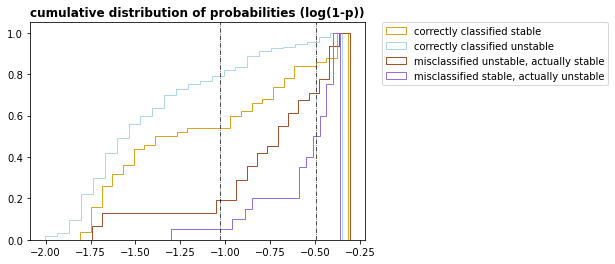

In [26]:
fig = plt.figure()
plt.title('cumulative distribution of probabilities (log(1-p))', fontweight='bold')

p = []
r2 = classifier2.predict_proba(features_test2)

for i in range(0,len(r2)):
    if (classes_test2[i] == classes_predict2[i]):
        if (classes_test2[i] == 0):
            p.append(np.log(1-r2[i][0]))
        else:
            p.append(np.log(1-r2[i][1]))
    else:
        if (classes_test2[i] == 0):
            p.append(np.log10(1-r2[i][1]))
        else:
            p.append(np.log10(1-r2[i][0]))
              

                
cs = []
cu = []
ts = []   # misclassified unstable, actually stable
tu = []   # misclassified stable, actually unstable


# correct
inds = []

for i in range(0,len(classes_test2)):
    if (classes_test2[i] == classes_predict2[i]):   # 0 = stable, 1 = unstable
        inds.append(i)

for i in range(0,len(r2)):
    if (classes_test2[i] == classes_predict2[i]):
        if (classes_test2[i] == 0):
            cs.append(np.log10(1-r2[i][0]))
        else:
            cu.append(np.log10(1-r2[i][1]))
            
            
# wrong
inds2 = []

for i in range(0,len(classes_test2)):
    if (classes_test2[i] != classes_predict2[i]):
        inds2.append(i)

for i in range(0,len(r2)):
    if (classes_test2[i] != classes_predict2[i]):
        if (classes_test2[i] == 0):
            ts.append(np.log10(1-r2[i][1]))
        else:
            tu.append(np.log10(1-r2[i][0]))
                
                
                
n, bins, patches = plt.hist(cs, 25, density=True, histtype='step', cumulative=True, label='correctly classified stable', color='goldenrod')
n, bins, patches = plt.hist(cu, 25, density=True, histtype='step', cumulative=True, label='correctly classified unstable', color='lightblue')
n, bins, patches = plt.hist(ts, 25, density=True, histtype='step', cumulative=True, label='misclassified unstable, actually stable', color='sienna')
n, bins, patches = plt.hist(tu, 25, density=True, histtype='step', cumulative=True, label='misclassified stable, actually unstable', color='mediumpurple')
# n, bins, patches = plt.hist(p, 25, density=True, histtype='step', cumulative=True, label='all', color='black', linewidth=1.25)



# sigmas, log10(1-0.68) = -0.495, log10(1-0.95) = -1.031, log10(1-0.997) = -2.523
plt.axvline(x=-0.495, color='black', linestyle='-.', linewidth=0.7)
plt.axvline(x=-1.031, color='black', linestyle='-.', linewidth=0.7)


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [27]:
print(metrics.classification_report(classes_test2, classes_predict2, digits=3))

              precision    recall  f1-score   support

           0      0.714     0.617     0.662        81
           1      0.865     0.909     0.886       219

    accuracy                          0.830       300
   macro avg      0.790     0.763     0.774       300
weighted avg      0.824     0.830     0.826       300

